<a href="https://colab.research.google.com/github/claubermartins/Stock-market-prediction/blob/main/stock_market_prediction-mrv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install inflection

#**1-Importando bibliotecas**

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping 
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import seaborn as sns
import datetime
import inflection
from IPython.core.display import HTML

#**2-Funções auxiliares para o Jupyter Notebook**

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [4]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


##**2.1Método de importação de arquivos do Google Colab**

In [5]:
from google.colab import files
upload = files.upload()
print("downloaded files: ")
print(*upload, sep = "\n")

Saving MRVE3-teste.csv to MRVE3-teste.csv
Saving MRVE3-treinamento.csv to MRVE3-treinamento.csv
downloaded files: 
MRVE3-teste.csv
MRVE3-treinamento.csv


#**3-Tratamento dos dados**

##**3.1-Importando os dados**

In [9]:
base = pd.read_csv('MRVE3-treinamento.csv')
base = base.drop('Date', axis = 1)

In [10]:
#valores estatísticos
base.describe()

,Open,High,Low,Close,Adj Close,Volume,media_movel
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2.231000e+03,2231.000000
mean,10.283918,10.469918,10.090187,10.274600,7.154917,4.074749e+06,10.284116
std,2.559057,2.579387,2.523019,2.551348,2.040824,2.699636e+06,2.552865
min,5.500065,5.590975,5.372790,5.500065,3.675109,0.000000e+00,5.587945
25%,7.841001,7.986458,7.681908,7.818274,5.337414,2.459295e+06,7.827365
50%,10.691035,10.881946,10.481942,10.691035,6.869619,3.558457e+06,10.681944
75%,12.231962,12.409237,12.018323,12.227417,8.821945,5.068960e+06,12.227417
max,16.636560,16.982018,16.591105,16.636560,12.112385,4.379862e+07,16.415345


In [11]:
base.dtypes

Open           float64
High           float64
Low            float64
Close          float64
Adj Close      float64
Volume           int64
media_movel    float64
dtype: object

##**3.2-Tratando os Valores Faltantes**

In [12]:
#valores faltantes
base.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
media_movel    0
dtype: int64

In [13]:
#encontrando onde os valores faltantes estão
base.loc[pd.isnull(base['Open'])]
base.loc[pd.isnull(base['High'])]
base.loc[pd.isnull(base['Low'])]
base.loc[pd.isnull(base['Close'])]
base.loc[pd.isnull(base['Adj Close'])]
base.loc[pd.isnull(base['Volume'])]
base.loc[pd.isnull(base['media_movel'])]

,Open,High,Low,Close,Adj Close,Volume,media_movel


In [14]:
#preenchendo os valores nulos com o valor médio
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
imputer = imputer.fit(base.iloc[:,0:7])
base.iloc[:,0:7] = imputer.transform(base.iloc[:,0:7])

In [15]:
#verificando novamente se ainda temos valores faltantes
base.loc[pd.isnull(base['Open'])]
base.loc[pd.isnull(base['High'])]
base.loc[pd.isnull(base['Low'])]
base.loc[pd.isnull(base['Close'])]
base.loc[pd.isnull(base['Adj Close'])]
base.loc[pd.isnull(base['Volume'])]
base.loc[pd.isnull(base['media_movel'])]

,Open,High,Low,Close,Adj Close,Volume,media_movel


##**3.3-Tratamento dos valores nulos (iguais a 0)**

In [16]:
#valores nulos
(base == 0).sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume         30
media_movel     0
dtype: int64

In [17]:
#Encontrando os valores nulos
base.loc[base['Volume'] == 0]

,Open,High,Low,Close,Adj Close,Volume,media_movel
284,12.018323,12.018323,12.018323,12.018323,7.226080,0.0,12.015293
291,12.181962,12.181962,12.181962,12.181962,7.324469,0.0,12.172871
308,11.709229,11.709229,11.709229,11.709229,7.040236,0.0,11.775896
319,11.954686,11.954686,11.954686,11.954686,7.187818,0.0,12.051657
333,12.500147,12.500147,12.500147,12.500147,7.515780,0.0,12.197113
337,13.709252,13.709252,13.709252,13.709252,8.242761,0.0,13.248641
450,10.691035,10.691035,10.691035,10.691035,6.515060,0.0,10.527397
451,10.691035,10.691035,10.691035,10.691035,6.515060,0.0,10.630428
452,10.691035,10.691035,10.691035,10.691035,6.515060,0.0,10.691035
461,9.909208,9.909208,9.909208,9.909208,6.038619,0.0,10.236484


In [18]:
#preenchendo os valores nulos com o valor médio
imputer = SimpleImputer(missing_values=0, strategy='mean',verbose=0)
imputer = imputer.fit(base.iloc[:,0:7])
base.iloc[:,0:7] = imputer.transform(base.iloc[:,0:7])

In [19]:
#Verificando novamente se ainda temos valores nulos
base.loc[base['Volume'] == 0]

,Open,High,Low,Close,Adj Close,Volume,media_movel


In [20]:
#base = base.dropna()

In [21]:
#base.sample()

#**-Descrição dos dados** IGNORE ESTA CÉLULA

In [ ]:
#Tendencia central - mean, median
ct1 = pd.DataFrame(base.apply(np.mean)).T #T transpondo 
ct2 = pd.DataFrame(base.apply(np.median)).T
#Dispersão - std(desvio padrão), min, max, range
d1 = pd.DataFrame(base.apply(np.std)).T
d2 = pd.DataFrame(base.apply(min)).T
d3 = pd.DataFrame(base.apply(max)).T
d4 = pd.DataFrame(base.apply(lambda x: x.max() - x.min())).T
#concatenate
m = pd.concat([d2,d3,d4,ct1,ct2,d1]).T.reset_index()
m.columns = ['attributes','min','max','range', 'mean', 'median', 'std']
m

In [ ]:
base.shape[0]

2478

#**4-Treinamento da rede**

In [22]:
#normalizando a base de dados com o MinMaxScaler
base_treinamento = base.iloc[:, 0:7].values
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [23]:
#Comparando a predição com o preço real
previsores = []
preco_real = []
for i in range(90, 2231):
    previsores.append(base_treinamento_normalizada[i-90:i, 0:7])
    preco_real.append(base_treinamento_normalizada[i, 3:4])
previsores, preco_real = np.array(previsores), np.array(preco_real)


In [24]:
#estrutura da rede neural 
regressor = Sequential()
regressor.add(LSTM(units = 90, return_sequences = True, input_shape = (previsores.shape[1], 7)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 90, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 90, return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 90))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'sigmoid'))

es = EarlyStopping(monitor = 'loss', min_delta = 1e-15, patience = 20, verbose = 1)

#regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error',
#                  metrics = ['mean_absolute_error'])
opt = tf.keras.optimizers.Adam(amsgrad=True)
regressor.compile(optimizer = opt, loss = 'mean_squared_error',
                  metrics = ['mean_absolute_error'])
#opt = tf.keras.optimizers.RMSprop(centered=True)
#regressor.compile(optimizer = opt, loss = 'mean_squared_error',
#                 metrics = ['mean_absolute_error'])

regressor.fit(previsores, preco_real, epochs = 600, batch_size = 32,
              callbacks = [es])
#regressor.fit(previsores, preco_real, epochs = 600, batch_size = 32)

Epoch 1/600
67/67 [==============================] - 18s 97ms/step - loss: 0.0133 - mean_absolute_error: 0.0845
Epoch 2/600
67/67 [==============================] - 7s 97ms/step - loss: 0.0052 - mean_absolute_error: 0.0560
Epoch 3/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0048 - mean_absolute_error: 0.0545
Epoch 4/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0037 - mean_absolute_error: 0.0477
Epoch 5/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0032 - mean_absolute_error: 0.0439
Epoch 6/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0033 - mean_absolute_error: 0.0456
Epoch 7/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0029 - mean_absolute_error: 0.0419
Epoch 8/600
67/67 [==============================] - 7s 99ms/step - loss: 0.0028 - mean_absolute_error: 0.0413
Epoch 9/600
67/67 [==============================] - 7s 98ms/step - loss: 0.0026 - mean_absolute_error: 0.0397


#**5-Teste da rede**

##**5.1-Importando os dados para teste**

In [25]:
#criando a base de dados teste
base_teste = pd.read_csv('MRVE3-teste.csv')
base_teste = base_teste.drop('Date', axis = 1)

In [26]:
#valores estatísticos
base_teste.describe()

,Open,High,Low,Close,Adj Close,Volume,media_movel
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,16.921538,17.216154,16.611417,16.922753,15.287639,5.124278e+06,16.883603
std,2.473257,2.513617,2.411601,2.470855,2.644206,2.523092e+06,2.450173
min,12.390000,12.660000,11.510000,11.540000,10.060345,1.478500e+06,12.540000
25%,14.485000,14.660000,14.240000,14.480000,12.623378,3.591750e+06,14.443333
50%,17.500000,17.850000,17.200001,17.450001,15.962334,4.461100e+06,17.533333
75%,18.745000,19.030000,18.224999,18.700001,17.114864,6.006200e+06,18.756667
max,22.379999,22.780001,21.790001,22.639999,21.697758,1.864060e+07,22.163333


##**5.2-Tratando os Valores Faltantes**

In [27]:
#valores faltantes
base_teste.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
media_movel    0
dtype: int64

In [28]:
#encontrando onde os valores faltantes estão
base_teste.loc[pd.isnull(base_teste['Open'])]
base_teste.loc[pd.isnull(base_teste['High'])]
base_teste.loc[pd.isnull(base_teste['Low'])]
base_teste.loc[pd.isnull(base_teste['Close'])]
base_teste.loc[pd.isnull(base_teste['Adj Close'])]
base_teste.loc[pd.isnull(base_teste['Volume'])]
base_teste.loc[pd.isnull(base['media_movel'])]

,Open,High,Low,Close,Adj Close,Volume,media_movel


In [29]:
#preenchendo os valores faltantes com o valor médio
imputer = SimpleImputer(missing_values=np.nan, strategy='mean',verbose=0)
imputer = imputer.fit(base_teste.iloc[:,0:7])
base_teste.iloc[:,0:7] = imputer.transform(base_teste.iloc[:,0:7])

In [30]:
#verificando novamente se ainda temos valores faltantes
base_teste.loc[pd.isnull(base_teste['Open'])]
base_teste.loc[pd.isnull(base_teste['High'])]
base_teste.loc[pd.isnull(base_teste['Low'])]
base_teste.loc[pd.isnull(base_teste['Close'])]
base_teste.loc[pd.isnull(base_teste['Adj Close'])]
base_teste.loc[pd.isnull(base_teste['Volume'])]
base_teste.loc[pd.isnull(base['media_movel'])]

,Open,High,Low,Close,Adj Close,Volume,media_movel


##**5.3-Tratamento dos valores nulos (iguais a 0)**

In [31]:
#valores nulos
(base_teste == 0).sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
media_movel    0
dtype: int64

In [32]:
#Encontrando os valores nulos
base_teste.loc[base_teste['Volume'] == 0]

,Open,High,Low,Close,Adj Close,Volume,media_movel


In [33]:
#preenchendo os valores nulos com o valor médio
imputer = SimpleImputer(missing_values=0, strategy='mean',verbose=0)
imputer = imputer.fit(base_teste.iloc[:,0:7])
base_teste.iloc[:,0:7] = imputer.transform(base_teste.iloc[:,0:7])

In [34]:
#Verificando novamente se tem valores nulos
base_teste.loc[base_teste['Volume'] == 0]

,Open,High,Low,Close,Adj Close,Volume,media_movel


##**5.4-Preparando a estrutura para teste**

In [35]:
#concatenando a base de dados teste com o base de treinamento
preco_real_teste = base_teste.iloc[:, 3:4].values
frames = [base, base_teste]
base_completa = pd.concat(frames)

In [36]:
#pegando os 90 registros anteriores para percorrer a base teste e colocando no
#no formato np.array
entradas = base_completa[len(base_completa) - len(base_teste) - 90:].values
entradas = normalizador.transform(entradas)
Percorrer_teste = []
for i in range(90, 338): 
    Percorrer_teste.append(entradas[i-90:i, 0:7])
Percorrer_teste = np.array(Percorrer_teste)

In [37]:
#resultado da predição no formato MinMaxScaler
previsoes = regressor.predict(Percorrer_teste)

In [38]:
#convertendo para a escala MinMaxScaler 
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[:,3:4])

array([[0.62857138],
       [0.61387753],
       [0.632653  ],
       ...,
       [0.55582434],
       [0.59533408],
       [0.6159869 ]])

In [39]:
#colocando a previsão no formato original para preparar a visualização no gráfico
previsoes = normalizador_previsao.inverse_transform(previsoes)
previsoes

array([[12.402915 ],
       [12.663782 ],
       [12.6635895],
       [12.59802  ],
       [12.693374 ],
       [13.04711  ],
       [13.473087 ],
       [13.400888 ],
       [13.41654  ],
       [13.81858  ],
       [13.793104 ],
       [13.7597065],
       [13.534599 ],
       [12.232148 ],
       [13.481191 ],
       [13.555665 ],
       [14.061717 ],
       [14.540892 ],
       [14.853287 ],
       [14.746295 ],
       [14.7504835],
       [14.8664875],
       [14.755632 ],
       [14.702597 ],
       [14.795291 ],
       [14.52301  ],
       [14.389186 ],
       [14.431825 ],
       [14.405329 ],
       [14.226025 ],
       [14.062817 ],
       [14.196352 ],
       [13.939728 ],
       [14.065104 ],
       [14.047718 ],
       [13.795714 ],
       [13.829396 ],
       [13.80089  ],
       [13.881097 ],
       [13.560805 ],
       [13.687044 ],
       [13.685836 ],
       [13.9082   ],
       [13.987249 ],
       [14.270349 ],
       [14.529609 ],
       [14.621481 ],
       [14.67

#**6-Análise dos resuldatos**

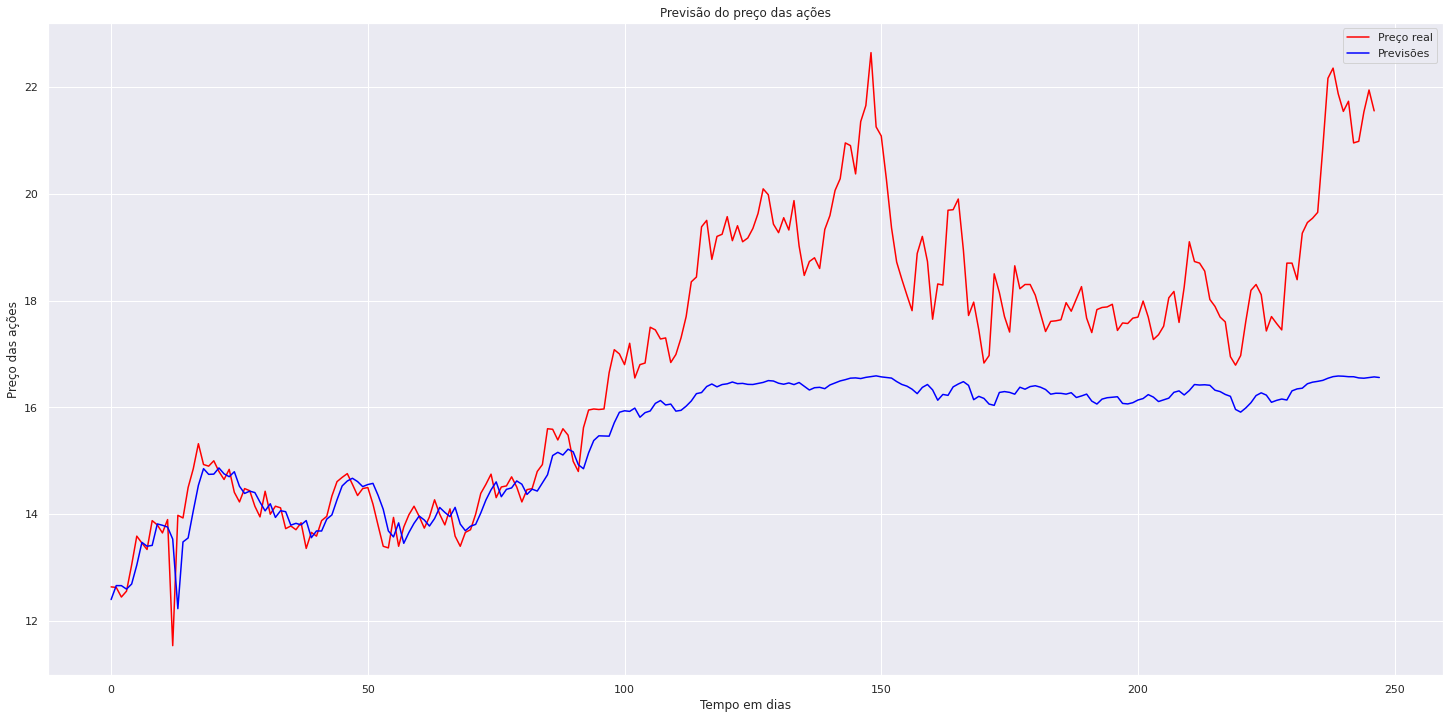

In [40]:
#Visualizando o gráfico da Previsão da rede
plt.plot(preco_real_teste, color = 'red', label = 'Preço real')
plt.plot(previsoes, color = 'blue', label = 'Previsões')
plt.title('Previsão do preço das ações')
plt.xlabel('Tempo em dias')
plt.ylabel('Preço das ações')
plt.legend()
plt.show()

In [41]:
#estatísticas do preço real comparado com a previsão
df1 = pd.DataFrame(preco_real_teste).T
df2 = pd.DataFrame(previsoes).T

df3 = pd.concat([df1,df2]).T
df3.columns = ['Preco real', 'Previsoes']
df3.describe()

,Preco real,Previsoes
count,247.000000,248.000000
mean,16.922753,15.453885
std,2.470855,1.140000
min,11.540000,12.232148
25%,14.480000,14.463585
50%,17.450001,16.113294
75%,18.700001,16.379586
max,22.639999,16.589716


In [ ]:
#df2 = pd.DataFrame(previsoes)
#df2.describe()

In [ ]:
#df1 = pd.DataFrame(preco_real_teste)
#df1.describe()